<a href="https://colab.research.google.com/github/ramahasiba/Zakey/blob/main/Rama_Hasiba_Section_3_Homework_COVID_19_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Section 3 Homework: COVID-19 Data Visualization

This notebook loads, cleans, and visualizes a COVID-19 dataset. We'll create three distinct plots to analyze the data and derive insights from them: a line plot to track trends, a bar chart to compare totals, and a scatter plot to explore relationships.

### 1. Setup and Data Loading

**Instructions:**
* Import the **pandas** and **matplotlib.pyplot** libraries.
* Load the dataset from the URL.
* Use `pd.to_datetime()` to convert the 'Date' column to the correct data type.
* Display the `.info()` and the first few rows (`.head()`) of the DataFrame to confirm it loaded correctly.

In [ ]:
# Your code to import libraries and load the data here
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

# Load the data into a DataFrame called 'df'
df = pd.read_csv(url)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Display info and head of the DataFrame
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


### 2. Line Plot: Confirmed Cases Over Time

**Instructions:**
* Choose a few countries (e.g., Malaysia, United States, India) to compare.
* Filter your DataFrame to only include data for these countries.
* Create a **line plot** showing the number of confirmed cases over time for each country.
* Add a title, axis labels, and a legend to make your plot clear and readable.

In [ ]:
# Explore unique countries
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

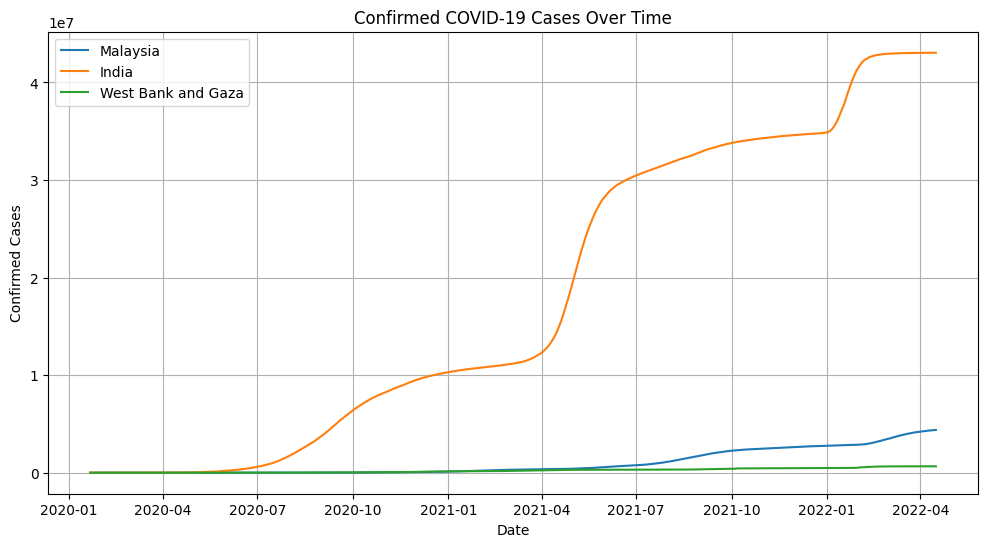

In [ ]:
# Your code for the line plot here
countries = ['Malaysia',  'India', 'West Bank and Gaza']
df_countries = df[df['Country'].isin(countries)]

# Create the line plot
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_countries[df_countries['Country'] == country]['Date'],
             df_countries[df_countries['Country'] == country]['Confirmed'],
             label=country)

plt.title('Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

### ✍️ Insights from the Line Plot

The chart shows the huge disparity in COVID-19 case counts, with India which had the largest surges, Malaysia a moderate increase, and West Bank & Gaza much lower overall case counts. This disparity might be studied with the population, and safety protocols took through the COVID period in each country.

### 3. Bar Chart: Comparing Totals

**Instructions:**
* From the full dataset, find the most recent cumulative total for 'Deaths' or 'Confirmed' cases for each country.
* Select the top 10 or 15 countries based on these totals.
* Create a **bar chart** to compare these countries.
* Make sure your chart has a title and clear labels. Rotate the x-axis labels if needed.

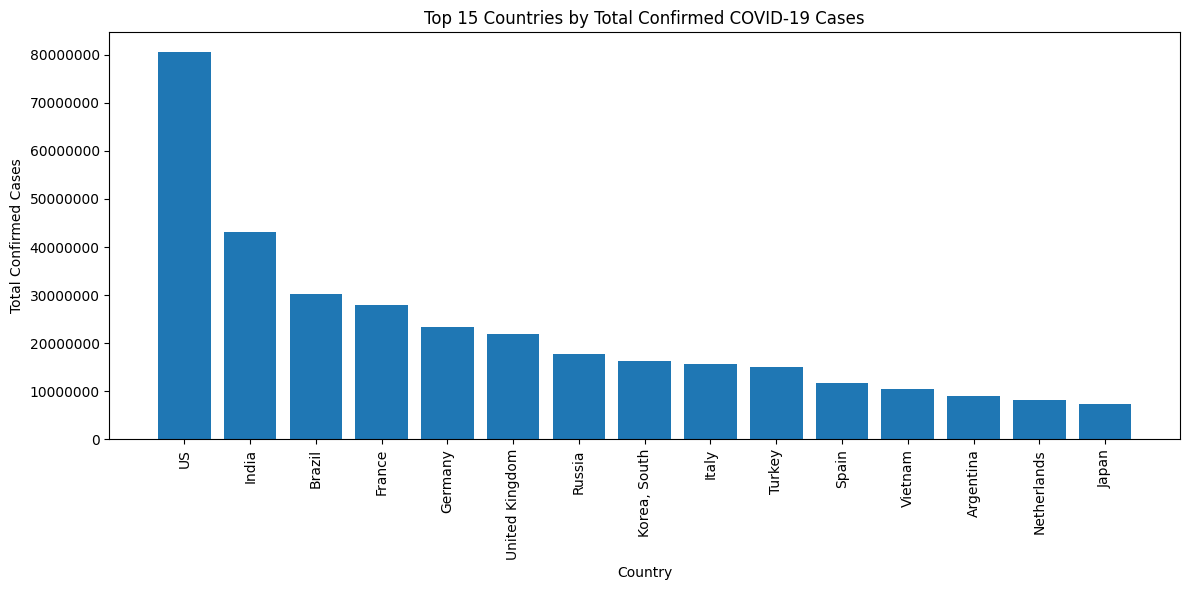

In [ ]:
# Your code for the bar chart here
# From the full dataset, find the most recent cumulative total for 'Deaths' or 'Confirmed' cases for each country.
latest_data = df.loc[df.groupby('Country')['Date'].idxmax()]

# Select the top 15 countries based on Confirmed cases
top_countries = latest_data.nlargest(15, 'Confirmed')

# Create a bar chart to compare these countries.
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['Confirmed'])

# Make sure your chart has a title and clear labels. Rotate the x-axis labels if needed.
plt.title('Top 15 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') # Remove scientific notation
plt.tight_layout()
plt.show()

### 4. Scatter Plot: Exploring Relationships

**Instructions:**
* Create a **scatter plot** to investigate the relationship between total 'Confirmed' cases and total 'Deaths' for all countries.
* Apply a **logarithmic scale** to both the x and y axes to better visualize the relationship across countries with vastly different numbers.
* Add a title and axis labels.

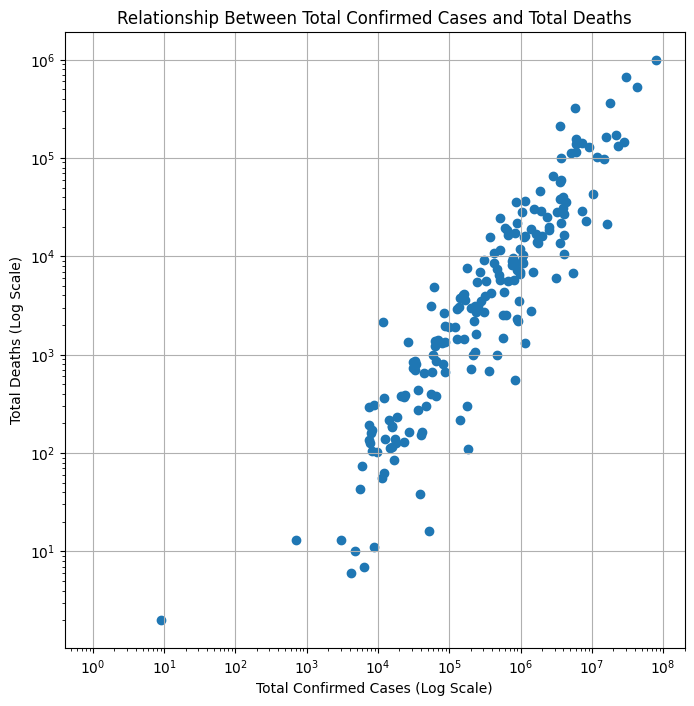

In [ ]:
# Your code for the scatter plot here

# Create a scatter plot to investigate the relationship between total 'Confirmed' cases and total 'Deaths' for all countries.
plt.figure(figsize=(8, 8))
plt.scatter(latest_data['Confirmed'], latest_data['Deaths'])

# Apply a logarithmic scale to both the x and y axes to better visualize the relationship across countries with vastly different numbers.
plt.xscale('log')
plt.yscale('log')

# Add a title and axis labels.
plt.title('Relationship Between Total Confirmed Cases and Total Deaths')
plt.xlabel('Total Confirmed Cases (Log Scale)')
plt.ylabel('Total Deaths (Log Scale)')
plt.grid(True)
plt.show()

### ✍️ Overall Insights & Conclusion

There is a clear strong positive relationship between the total number of confirmed COVID-19 cases and the total number of deaths. As the number of confirmed cases increases, the number of deaths also tends to rise.


This scatter indicates that the differences in confirmed cases, observed in the bar chart above, may be explained by differences in population size across countries. Larger populations naturally tend to have higher total case counts, which is reflected in the positive relationship between total confirmed cases and total deaths as well. Smaller countries, on the other hand, show lower totals simply because of their limited population base.